FAKE NEWS DETECTION PROBLEM

In [1]:
!pip install wordcloud


In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import re
import string


data preprocessing

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
#printing stopwords
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
df_fake=pd.read_csv("Fake.csv")
df_true=pd.read_csv("True.csv")

In [6]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [9]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [10]:
df_fake["class"]=0
df_true["class"]=1

In [11]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [12]:
df_fake['title'] = df_fake['title'].astype(str)
df_true['title'] = df_true['title'].astype(str)
df_fake['title'] = df_fake['title'].fillna("")
df_true['title'] = df_true['title'].fillna("")


In [13]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


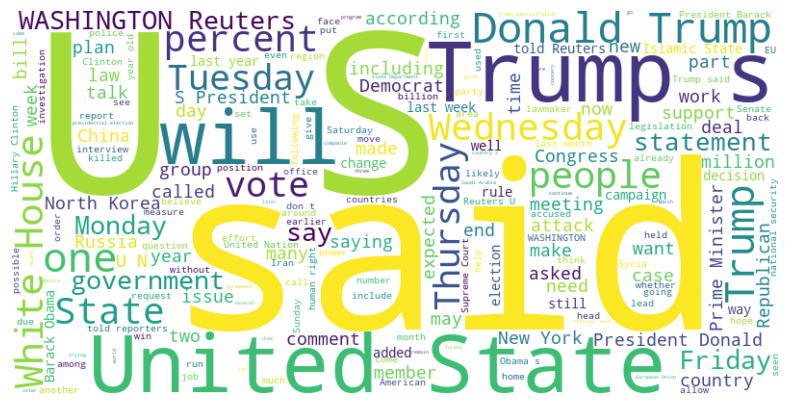

In [14]:

#############created the most frequently used words in the text column of df_true dataframe
from PIL import Image
# Load the brain-shaped mask image
 # Replace with the path to your brain-shaped mask image

# Create a WordCloud object with the brain-shaped mask
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_true['text']))

# Display the word cloud in the shape of a brain
plt.figure(figsize=(10, 5))
#method for resampling and smoothing images
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


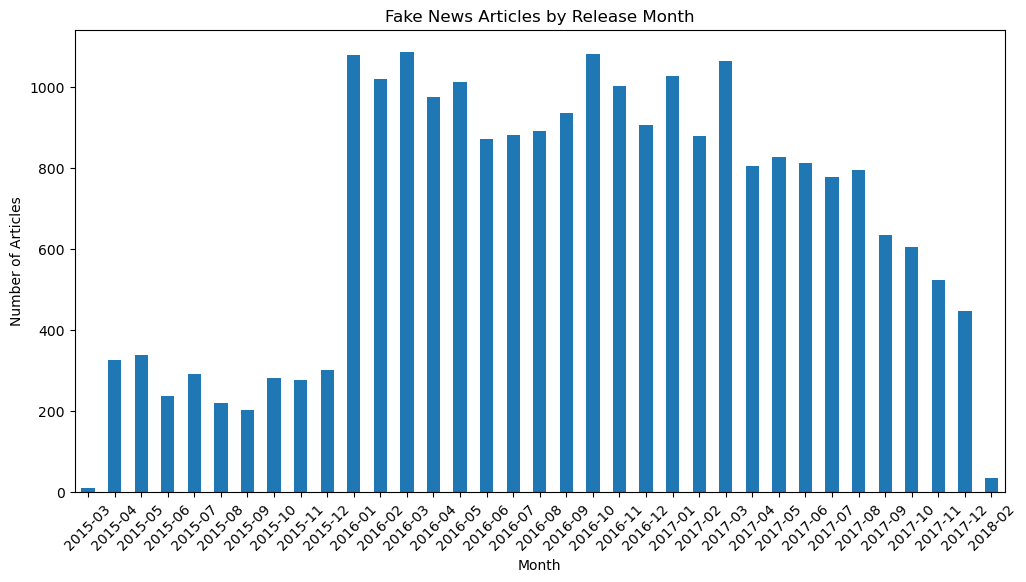

In [15]:
#### graph of the release date and frequency of fake news
import re
from dateutil.parser import parse


def custom_date_parser(date_str):
    match = re.search(r'\d{4}-\d{2}-\d{2}|\d{2}-[A-Za-z]{3}-\d{2}|[A-Za-z]+\s+\d{1,2},\s+\d{4}', date_str)
    if match:
        return parse(match.group(0))
    return None

# Apply the custom date parsing function to the 'date' column
df_fake['date'] = df_fake['date'].apply(custom_date_parser)

# Group the data by the 'month' extracted from the 'date' column and count the number of articles for each month
df_fake['month'] = df_fake['date'].dt.to_period('M')  # Extract the month from the date
month_counts = df_fake.groupby('month').size()

# Create the bar plot using Matplotlib
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar')
plt.title('Fake News Articles by Release Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()




In [16]:
df_fake = df_fake.drop('month', axis=1)

converting text to numeric of the title part


creating a new csv where we store mix of fake and true news

In [17]:
df_fake_manual_testing=df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis=0,inplace=True)
df_true_manual_testing=df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i],axis=0,inplace=True)

In [18]:
df_manual_testing=pd.concat([df_fake_manual_testing,df_true_manual_testing],axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [19]:
df_merge=pd.concat([df_fake,df_true],axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,2017-12-25 00:00:00,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,2017-12-23 00:00:00,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,2017-12-23 00:00:00,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,2017-12-22 00:00:00,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,2017-12-21 00:00:00,0


In [20]:
#removing columns which are not imp
df=df_merge.drop(["title","subject","date"],axis=1)
df.head(10)


,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [21]:
#shuffling data
df= df.sample(frac=1)

In [22]:
df.head(10)

,text,class
51,Donald Trump retweeted fake news videos in the...,0
2294,(Reuters) - Puerto Rico’s federally appointed ...,1
10484,ABC political hack Martha Raddatz tried to bai...,0
318,You may not be familiar with the name Unileve...,0
14746,A beautiful story of generosity and kindness t...,0
6433,Conservative columnist Ann Coulter took her vo...,0
19044,SEOUL (Reuters) - Supporters of former South K...,1
7075,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) - D...",1
19330,Hillary Clinton has turned down repeated reque...,0
5307,NEW YORK (Reuters) - A Florida man pleaded gui...,1


In [23]:
#checking null
df.isnull().sum()

text     0
class    0
dtype: int64

In [24]:
#removing special char and unnecessary strings
#using a func for the following
def word_drop(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www.\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text
    

In [25]:
df["text"]=df["text"].apply(word_drop)

In [26]:
df.head(10)

,text,class
51,donald trump retweeted fake news videos in the...,0
2294,reuters puerto rico s federally appointed ...,1
10484,abc political hack martha raddatz tried to bai...,0
318,you may not be familiar with the name unileve...,0
14746,a beautiful story of generosity and kindness t...,0
6433,conservative columnist ann coulter took her vo...,0
19044,seoul reuters supporters of former south k...,1
7075,west palm beach fla washington reuters d...,1
19330,hillary clinton has turned down repeated reque...,0
5307,new york reuters a florida man pleaded gui...,1


In [27]:
x=df["text"]
y=df["class"]


In [28]:
#train and test with 25% data for test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [29]:
#vectorize text
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)
mymodel=LR.fit(xv_train,y_train)

In [33]:
LR.score(xv_test,y_test)

0.9863636363636363

In [34]:
pred_LR=LR.predict(xv_test)

In [35]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5840
           1       0.99      0.99      0.99      5380

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [36]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scores=cross_val_score(mymodel,xv_train,y_train,scoring='r2',cv=10)
scores



array([0.93806564, 0.94402087, 0.96188655, 0.92496415, 0.9499761 ,
       0.94521192, 0.94044774, 0.93806212, 0.94757687, 0.93923683])

In [37]:
#priniting the avg scores
print(np.mean(scores))

0.9429448782596731


In [38]:
# printing the scores on the test dataset 
## importing cross_val_predict function
from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(LR,xv_train,y_train)
pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [39]:
scores_test=cross_val_score(LR,xv_train,y_train,cv=10)
scores_test

array([0.9845514 , 0.98603684, 0.99049317, 0.98128342, 0.98752228,
       0.98633393, 0.98514557, 0.9845514 , 0.98692422, 0.98484398])

In [40]:
print(np.mean(scores_test))

0.9857686205645301


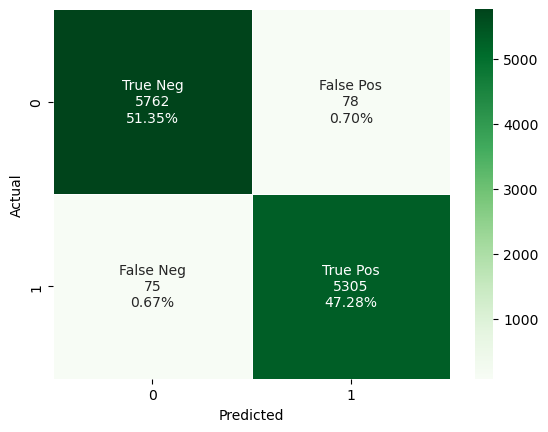

In [41]:
#confusion matrixxxx(true neg true pos false neg,false pos)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,pred_LR)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

# Format labels for the heatmap
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create the heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens', linewidths=.5)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [44]:
DT.score(xv_test,y_test)

0.9958110516934047

In [45]:
pred_DT=DT.predict(xv_test)

In [46]:
accuracy = accuracy_score(y_test, pred_DT)
accuracy

0.9958110516934047

In [47]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5840
           1       1.00      0.99      1.00      5380

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [48]:


# Define the range of maximum leaf nodes to test
max_leaf_nodes_range = [5, 10, 20, 30, 50]

for max_leaf_nodes in max_leaf_nodes_range:
    DT = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)

    # Train the Decision Tree classifier on the training data
    DT.fit(xv_train, y_train)

    # Make predictions on the validation data
    y_val_pred = DT.predict(xv_test)

    # Calculate the accuracy of the model on the validation set
    validation_accuracy = accuracy_score(y_test, y_val_pred)
    print(f"Max Leaf Nodes: {max_leaf_nodes}, Accuracy on the validation set: {validation_accuracy:.2f}")


Max Leaf Nodes: 5, Accuracy on the validation set: 0.99
Max Leaf Nodes: 10, Accuracy on the validation set: 0.99
Max Leaf Nodes: 20, Accuracy on the validation set: 1.00
Max Leaf Nodes: 30, Accuracy on the validation set: 1.00
Max Leaf Nodes: 50, Accuracy on the validation set: 1.00


Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [51]:
RFC.score(xv_test,y_test)

0.989126559714795

In [52]:
pred_RFC=RFC.predict(xv_test)

In [53]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5840
           1       0.99      0.99      0.99      5380

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [77]:
###3validating by using oob score 

###it serves as a form of internal validation within the Random Forest ensemble. 
# Create a Random Forest classifier with a specified number of trees (n_estimators)
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42,max_depth=20,min_samples_split=5)  # Adjust n_estimators and other hyperparameters as needed

# Train the Random Forest classifier on the training data
RF.fit(xv_train, y_train)

# Access the OOB score
oob_score = RF.oob_score_
print(f"Out-of-Bag (OOB) Accuracy: {oob_score:.2f}")


Out-of-Bag (OOB) Accuracy: 0.98


In [55]:
#train and test with 5% data for test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.05)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [58]:
### score will increase

In [59]:
LR.score(xv_test,y_test)

0.9893048128342246

In [60]:
###decision tree 
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [61]:
###accuracy score increases

In [62]:
DT.score(xv_test,y_test)

0.9977718360071302

In [63]:
##random forest on 5%test data
RFC=RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [64]:
###accuracy score increases

In [65]:
RFC.score(xv_test,y_test)

0.9924242424242424

Manual Testing

In [66]:
#full function
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not a Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    
    pred_RFC = RFC.predict(new_xv_test)

    return print("\nLR Prediction: {} \nDT Prediction:  {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]), output_label(pred_DT[0]), output_label(pred_RFC[0])))


In [71]:
news=str(input())
manual_testing(news)

The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage & Russia hoax! [0746 EST] - Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE! [0804 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 

LR Prediction: Not a Fake News 
DT Prediction:  Not a Fake News 
RFC Prediction: Not a Fake News


In [68]:
news=str(input())
manual_testing(news)

On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fol

In [72]:
news=str(input())
manual_testing(news)
#random news from net 


Former US President Donald Trump leads in five of the six most important US states exactly a year before the US election according to polls released on November 5, that were conducted by the New York Times and Siena College, reported Reuters.

LR Prediction: Fake News 
DT Prediction:  Not a Fake News 
RFC Prediction: Not a Fake News


In [73]:
news=str(input())
manual_testing(news)

On Election Day, Trump over-performed his polls, winning several key swing states, while losing the popular vote by 2.87 million votes.[19] Trump received the majority in the Electoral College and won upset victories in the Rust Belt region.

LR Prediction: Fake News 
DT Prediction:  Fake News 
RFC Prediction: Not a Fake News


In [74]:
news=str(input())
manual_testing(news)

United States Presidential Election of 2016, American presidential election held on November 8, 2016, in which Republican Donald Trump lost the popular vote to Democrat Hillary Clinton by more than 2.8 million votes but won 30 states and the decisive electoral college with 304 electoral votes to Clinton’s 227 and thus became the 45th president of the United States.

LR Prediction: Not a Fake News 
DT Prediction:  Fake News 
RFC Prediction: Not a Fake News
